# Credit Card Fraud Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
df=pd.read_csv(r"C:\Users\KUMUDHAA\Downloads\Credit-Score-Data\Credit Score Data\train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
df.shape

(100000, 28)

### Checking for Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Exploratory Data Analysis

In [8]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
categorical_variables = ['Name','Occupation','Type_of_Loan','Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']

In [10]:
df["Occupation"].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [11]:
df["Type_of_Loan"].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [12]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [13]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [14]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

## Data Visualisation with categorical columns 

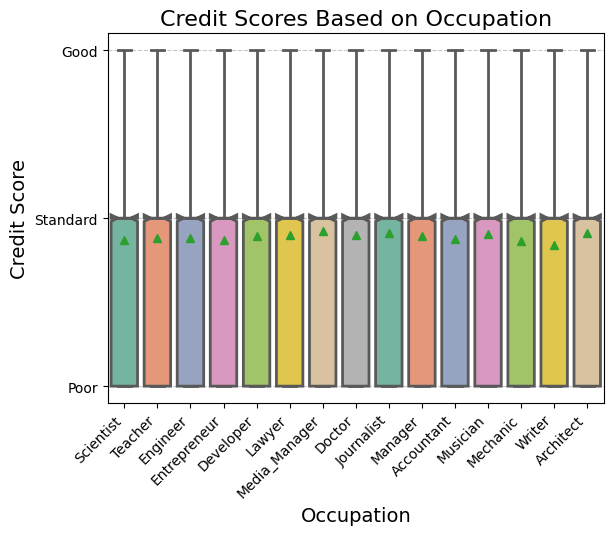

<Figure size 2000x1500 with 0 Axes>

In [15]:
sns.boxplot(
    x = "Occupation",
    y = "Credit_Score",
    showmeans=True,  
    data=df,
    linewidth=2,  
    notch=True,  
    palette='Set2',  
    saturation=0.7,  
)
plt.title("Credit Scores Based on Occupation", fontsize=16)  
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Occupation", fontsize=14) 
plt.ylabel("Credit Score", fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(20, 15))  
plt.tight_layout()  
plt.show()

The Credit score distribution for all occupations are almost the same 

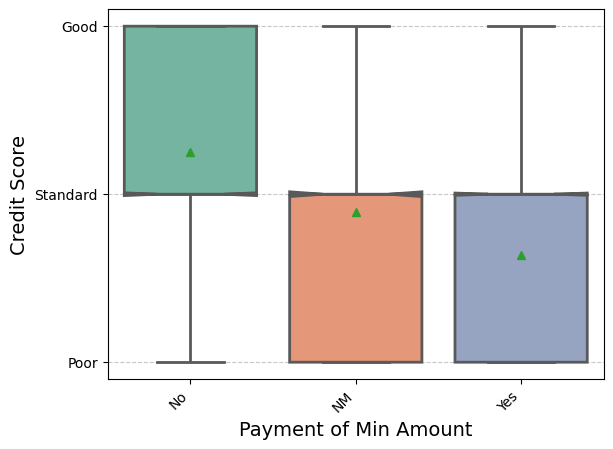

<Figure size 2000x1500 with 0 Axes>

In [16]:
sns.boxplot(
    x = 'Payment_of_Min_Amount',
    y = "Credit_Score",
    showmeans=True,  
    data=df,
    linewidth=2,  
    notch=True,  
    palette='Set2',  
    saturation=0.7,  
)  
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Payment of Min Amount', fontsize=14) 
plt.ylabel("Credit Score", fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(20, 15))  
plt.tight_layout()  
plt.show()

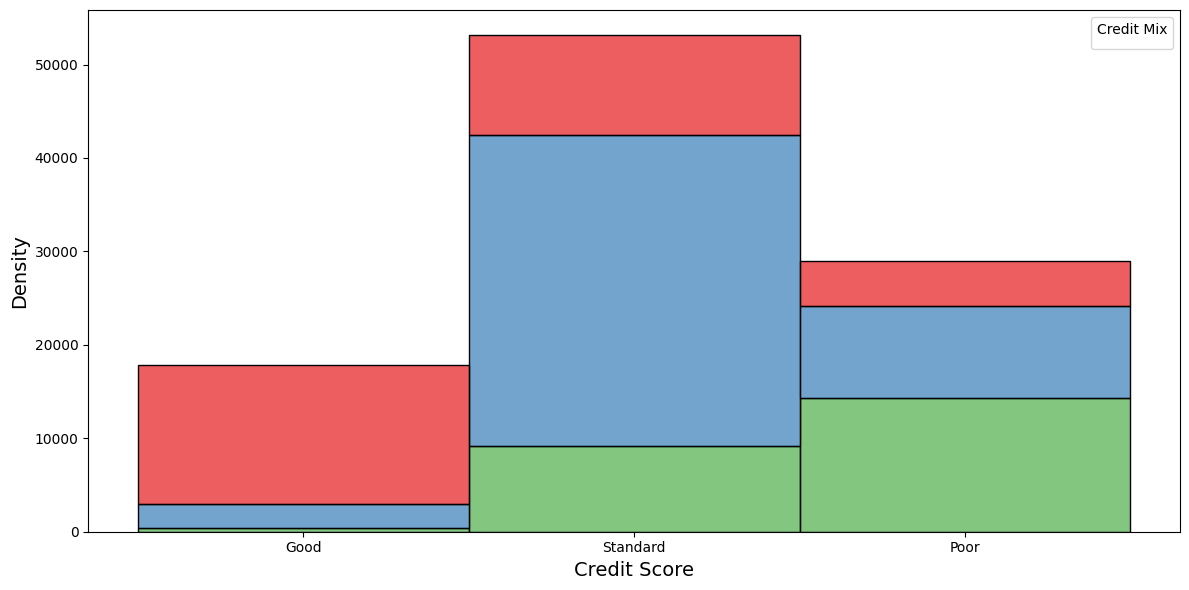

In [17]:
plt.figure(figsize=(12, 6))  

sns.histplot(
    x="Credit_Score",
    hue="Credit_Mix",
    multiple="stack", 
    data=df,
    palette='Set1',
    alpha=0.7
)

plt.legend(title="Credit Mix", loc='upper right') 
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.tight_layout()
plt.show()

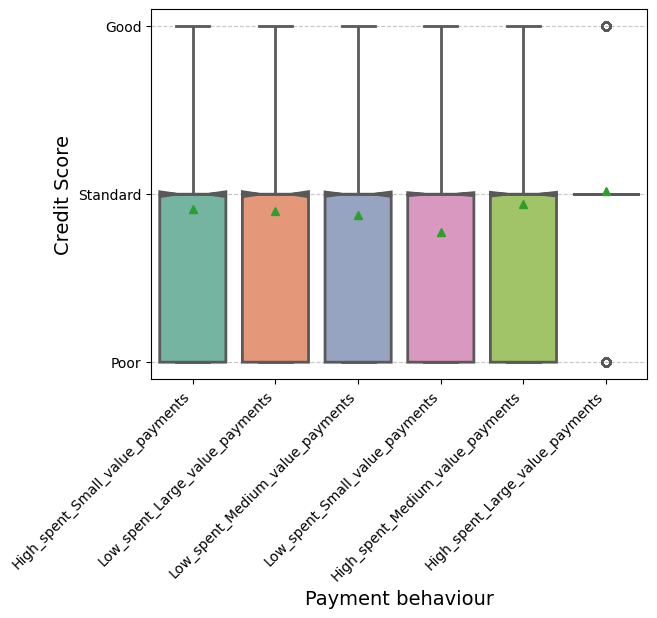

<Figure size 2000x1500 with 0 Axes>

In [18]:
sns.boxplot(
    x = "Payment_Behaviour",
    y = "Credit_Score",
    showmeans=True,  
    data=df,
    linewidth=2,  
    notch=True,  
    palette='Set2',  
    saturation=0.7,  
)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Payment behaviour", fontsize=14) 
plt.ylabel("Credit Score", fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(20, 15))  
plt.tight_layout()  
plt.show()

In [19]:
##One hot encoding of useful categorical variables
df = pd.get_dummies(df, columns=['Payment_of_Min_Amount',"Credit_Mix"], dtype=int)

In [20]:
df["Credit_Score"] = df["Credit_Score"].map({"Standard": 1,
                               "Good": 2,
                               "Poor": 0}).astype("float64")

Order of features with the highest correlations (excluding Credit Score):
Index(['Interest_Rate', 'Num_Credit_Inquiries', 'Delay_from_due_date',
       'Num_Credit_Card', 'Credit_History_Age', 'Num_Bank_Accounts',
       'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Num_of_Loan',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance',
       'Amount_invested_monthly', 'Changed_Credit_Limit', 'Age',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Month',
       'Customer_ID', 'ID'],
      dtype='object')


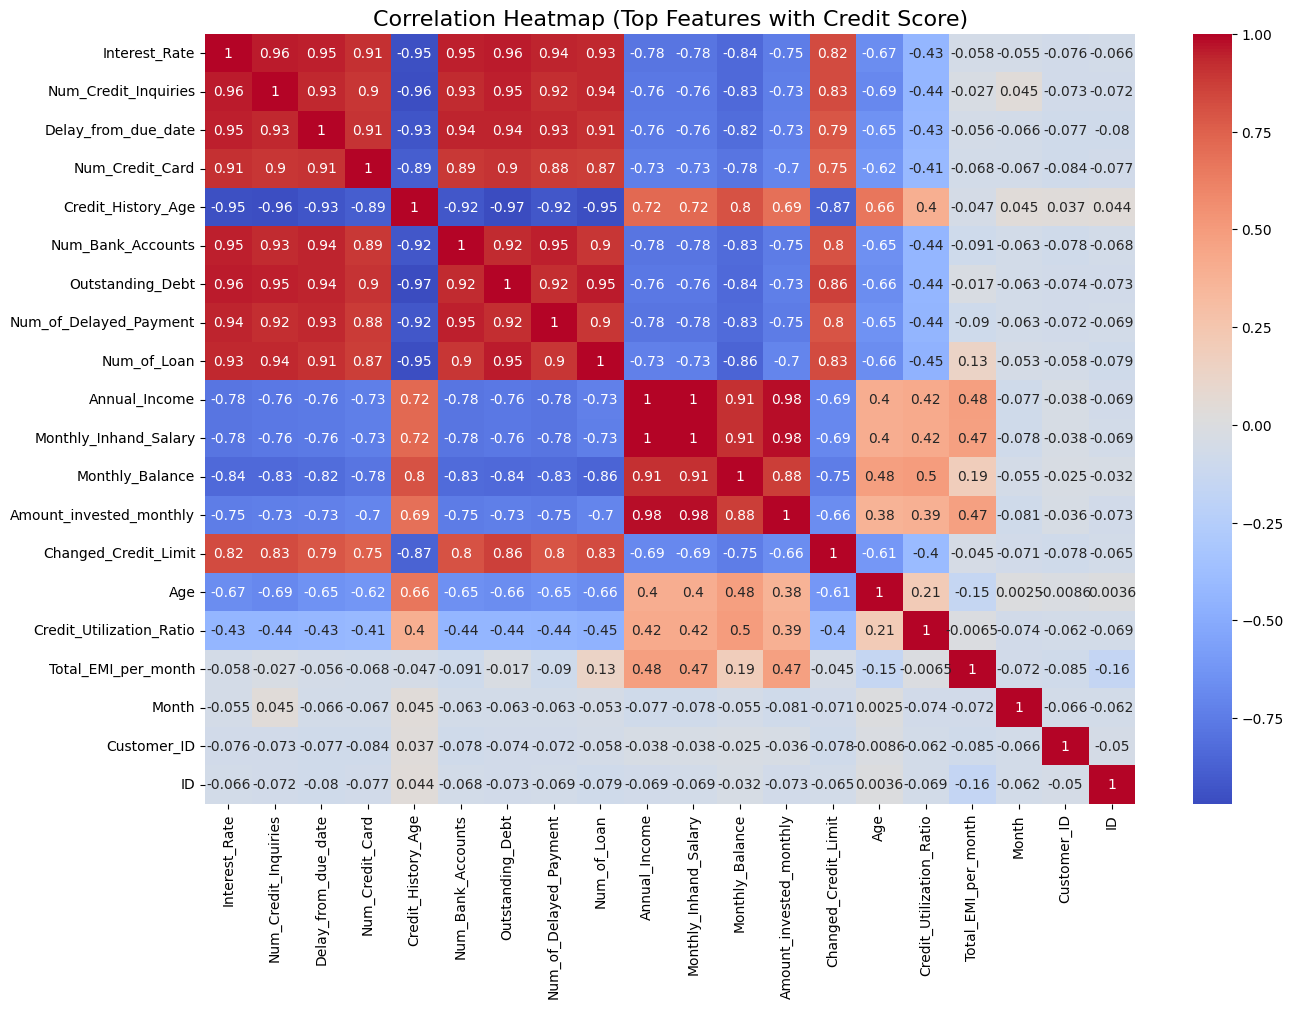

In [21]:
correlations = df[['ID', 'Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                   'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
                   'Monthly_Balance',"Credit_Score"]].corr()

target_correlations = correlations['Credit_Score']

sorted_correlations = target_correlations.abs().sort_values(ascending=False)
top_features = sorted_correlations.index[1:]  

print(f"Order of features with the highest correlations (excluding Credit Score):")
print(top_features)

plt.figure(figsize=(15, 10))
sns.heatmap(correlations[top_features].corr(), annot=True, cmap='coolwarm')  
plt.title("Correlation Heatmap (Top Features with Credit Score)", fontsize=16)
plt.show()

In [22]:
##The columns ID, Customer_ID, Month and Total_EMI_per_month have almost zero correlation with Credit_Score 

In [23]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]=scaler.fit_transform(df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']])

In [24]:
df = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance','Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard',"Credit_Score"]]

In [25]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Score
0,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,...,-0.439448,-0.862311,-0.397733,0,1,0,0,1,0,2.0
1,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,...,-0.439448,-0.862311,-0.535916,0,1,0,0,1,0,2.0
2,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,...,-0.439448,-0.862311,-0.304920,0,1,0,0,1,0,2.0
3,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,...,-0.439448,-0.862311,-0.839300,0,1,0,0,1,0,2.0
4,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,...,-0.439448,-0.862311,-0.253945,0,1,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.772552,-0.283978,-0.262946,-0.527829,0.225646,-0.861667,-0.626600,0.129595,-1.012183,0.155789,...,-0.548856,-0.796602,0.432273,0,1,0,0,1,0,0.0
99996,-0.772552,-0.283978,-0.262946,-0.527829,0.225646,-0.861667,-0.626600,-0.208140,-1.012183,0.155789,...,-0.548856,-0.796602,0.515513,0,1,0,0,1,0,0.0
99997,-0.772552,-0.283978,-0.262946,-0.527829,0.225646,-0.861667,-0.626600,0.399784,-1.172513,0.155789,...,-0.548856,-0.796602,0.615475,0,1,0,0,1,0,0.0
99998,-0.772552,-0.283978,-0.262946,-0.527829,0.225646,-0.861667,-0.626600,-0.073046,-1.172513,0.155789,...,-0.548856,-0.796602,-0.364652,0,1,0,0,1,0,1.0


In [29]:
X = df.drop(["Credit_Score"], axis=1)
y = df["Credit_Score"]

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [31]:
y.value_counts(normalize=True)

Credit_Score
1.0    0.53174
0.0    0.28998
2.0    0.17828
Name: proportion, dtype: float64

### Model Selection and RandomizedSearchCV

In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, f1_score

In [35]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

model = XGBClassifier()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost model: {accuracy:.4f}")

Accuracy of XGBoost model: 0.8104


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy:.4f}")

Accuracy of Random Forest model: 0.8181


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy:.4f}")

Accuracy of SVM model: 0.7118


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=100, test_size=0.020)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier 

model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [500, 800, 1000],  
            'max_depth': [None,15, 50, 80],         
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),     
        'params': {
            'n_estimators': [500, 800, 1000],  
            'max_depth': [None,10, 50, 80],          
    }
}
}

n_iter = 10 

for model_type, model_config in model_params.items():
    model = model_config['model']
    param_grid = model_config['params']

    random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=n_iter)
    random_search.fit(X_val, y_val)

    print(f"\nBest {model_type} Parameters:", random_search.best_params_)
    print(f"Best {model_type} Score:", random_search.best_score_)



Best Random Forest Parameters: {'n_estimators': 800, 'max_depth': None}
Best Random Forest Score: 0.6681250000000001

Best XGBoost Parameters: {'n_estimators': 800, 'max_depth': 50}
Best XGBoost Score: 0.6412500000000001


In [61]:
from sklearn.model_selection import StratifiedKFold

model = RandomForestClassifier(n_estimators=800)
   
skf = StratifiedKFold(n_splits=3) 

accuracy_scores = []

for train_index, test_index in skf.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)

        y_pred = model.predict(X_test_cv)
        accuracy_score_ = accuracy_score(y_test_cv, y_pred)
        accuracy_scores.append(accuracy_score_)

print(f"** Model: Random forest Classifier **")
print(f"Accuracy Score (Average): {np.mean(accuracy_scores)}")

** Model: Random forest Classifier **
Accuracy Score (Average): 0.8006504932193996


In [62]:
model = RandomForestClassifier(n_estimators=800)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

In [63]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(report)

0.8164
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      5879
         1.0       0.84      0.81      0.83     10571
         2.0       0.79      0.78      0.78      3550

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

